## The goal
The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

### Dataset

In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

%matplotlib inline

In [378]:
# url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
# !wget $url

In [379]:
df = pd.read_csv("car_fuel_efficiency.csv")

In [380]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [381]:
len(df)

9704

In [382]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail?

Text(0.5, 0, 'Miles per Gallon')

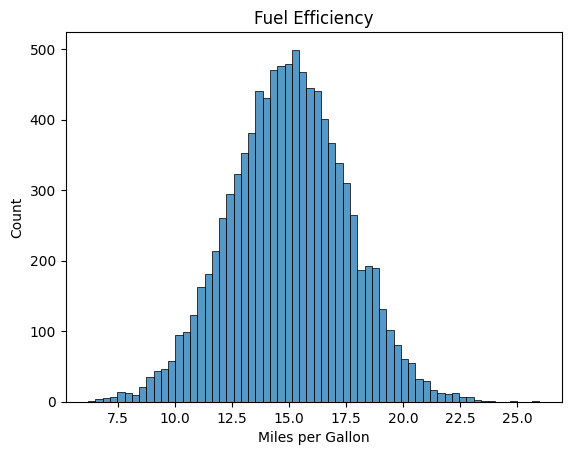

In [383]:
plot = sns.histplot(df["fuel_efficiency_mpg"])
plot.set_title("Fuel Efficiency")
plot.set_xlabel("Miles per Gallon")

#### Calculate skewness using the `skew` function.

In [426]:
skewness = df["fuel_efficiency_mpg"].skew()
skewness

np.float64(-0.012062219273507922)

The `skewness` value is < 0 that means there is a left long tail.

#### Calculate skewness using the `mean` and `median` functions

In [428]:
mean = df["fuel_efficiency_mpg"].mean()
median = df["fuel_efficiency_mpg"].median()

[mean, median, median - mean]

[np.float64(14.985243228208573),
 np.float64(15.006036963481211),
 np.float64(0.020793735272638614)]

The `median` value is more than the `mean` value that means there is a left long tail.

Since the `skewness` value is pretty small, we can say that there is no long tail in our dataset.

### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

In [385]:
base_features = ["engine_displacement", "horsepower",
         "vehicle_weight", "model_year", "fuel_efficiency_mpg"]
base_features

['engine_displacement',
 'horsepower',
 'vehicle_weight',
 'model_year',
 'fuel_efficiency_mpg']

In [386]:
df = df[base_features]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`

In [387]:
is_null_columns = df.isnull().sum()
is_null_columns

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [388]:
is_null_columns[is_null_columns > 0].index[0]

'horsepower'

In [389]:
print(
    f"The column with the missing values is '{is_null_columns[is_null_columns > 0].index[0]}'")

The column with the missing values is 'horsepower'


### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

In [390]:
print(f"The median for the 'horsepower' column is {df["horsepower"].median()}")

The median for the 'horsepower' column is 149.0


### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [391]:
rng = np.random.default_rng(seed=42)
indices = rng.permutation(len(df))
indices

array([1425, 7185, 7477, ..., 4802, 5668, 5729], shape=(9704,))

In [392]:
train_items_count = int(len(df) * 0.6)
validation_items_count = int(len(df) * 0.2)
test_items_count = len(df) - train_items_count - validation_items_count

print(
    f"train counts: {train_items_count}, validate counts: {validation_items_count}, test counts: {test_items_count}")

train counts: 5822, validate counts: 1940, test counts: 1942


In [393]:
indices[:train_items_count]

array([1425, 7185, 7477, ..., 2301, 2930, 3224], shape=(5822,))

In [394]:
df_train = df.iloc[indices[:train_items_count]].copy()
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
1425,190,135.0,3346.051384,2015,13.046346
7185,270,133.0,3360.818964,2001,13.064209
7477,210,95.0,3205.619985,2011,13.978858
7569,250,168.0,2428.658043,2011,17.960291
2481,160,162.0,3331.376582,2004,13.616607
...,...,...,...,...,...
1743,220,102.0,2843.124392,2018,15.304355
1799,180,133.0,2540.965832,2019,18.227340
2301,270,181.0,1925.667227,2011,20.158528
2930,120,177.0,2543.264869,2007,18.210303


In [395]:
indices[train_items_count:train_items_count + validation_items_count]

array([4819, 1557, 8179, ..., 1588, 3238, 3821], shape=(1940,))

In [396]:
df_validation = df.iloc[indices[train_items_count:train_items_count + validation_items_count]].copy()
df_validation

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
4819,230,161.0,3073.167035,2002,14.670715
1557,120,128.0,2894.629313,2016,15.283716
8179,190,152.0,3952.936516,2003,9.537177
9111,150,180.0,3178.656087,2002,14.325738
9381,190,102.0,3224.367698,2005,14.173315
...,...,...,...,...,...
9191,270,87.0,2357.702482,2004,17.611863
2523,180,159.0,3380.735446,2009,13.850521
1588,280,135.0,3784.764385,2023,11.449168
3238,120,189.0,3956.495364,2005,10.820563


In [397]:
df_test = df.iloc[indices[len(df) - test_items_count:]].copy()
df_test

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
3107,220,NaN,3269.337602,2008,13.537869
5170,260,122.0,3082.996335,2022,13.442500
932,250,223.0,3273.182662,2013,13.103039
9157,140,180.0,2904.042056,2004,15.597640
5067,170,164.0,2631.464920,2001,16.272901
...,...,...,...,...,...
491,230,174.0,3980.215823,2002,10.643951
2189,180,143.0,2736.540450,2015,16.220643
4802,230,168.0,2574.688086,2016,16.953562
5668,170,162.0,3092.426902,2016,15.095843


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

#### Common functions

In [398]:
def get_X_y(df: DataFrame, y_column_name="fuel_efficiency_mpg"):
    y_result = df[y_column_name].values
    X_result = df.drop([y_column_name], axis=1).values

    return X_result, y_result

In [399]:
def create_copy_and_fill_with_value(df: DataFrame, value: float, column_name="horsepower"):
    result = df.copy(deep=True)
    result[column_name] = df[column_name].fillna(value)

    return result

In [400]:
def calculate_linear_regression(X, y):
    XT = X.T
    XTX = XT.dot(X)
    XTX_inv = np.linalg.inv(XTX)

    result = XTX_inv.dot(XT).dot(y)
    return result

In [413]:
def calculate_weights(X, y):
    ones = np.ones(X.shape[0])
    X_extended = np.column_stack([ones, X])
    linear_regression_result = calculate_linear_regression(X_extended, y)

    w0 = linear_regression_result[0]
    weights = linear_regression_result[1:]

    return w0, weights


In [407]:
import matplotlib.pyplot as plt

def plot_feature_weights(weights, subtitle=""):
    """
    Plots a bar chart to visualize the impact of feature weights.

    Parameters:
    - weights (list or array): Corresponding weights for the features.
    - title (str): Title of the plot (default: "Impact of Each Weight on Fuel Efficiency (MPG)").
    """
    feature_names = ["engine_displacement", "horsepower", "vehicle_weight", "model_year"]
    title=f"Impact of Each Weight on Fuel Efficiency (MPG){subtitle}"

    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, weights, color='skyblue')

    # Add labels and title
    plt.xlabel("Features")
    plt.ylabel("Weights")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

#### Question 3.1. Fill missing values with 0.

In [408]:
df_train_with_zeros = create_copy_and_fill_with_value(df, value=0)

X_train, y_train = get_X_y(df_train_with_zeros)
[X_train, y_train]

[array([[ 170.        ,  159.        , 3413.43375861, 2003.        ],
        [ 130.        ,   97.        , 3149.66493422, 2007.        ],
        [ 170.        ,   78.        , 3079.03899737, 2018.        ],
        ...,
        [ 220.        ,  138.        , 2583.47131761, 2008.        ],
        [ 230.        ,  177.        , 2905.52738998, 2011.        ],
        [ 270.        ,  140.        , 2908.04347736, 2005.        ]],
       shape=(9704, 4)),
 array([13.23172891, 13.68821744, 14.246341  , ..., 17.18658678,
        15.33155059, 14.8844674 ], shape=(9704,))]

In [409]:
df_validation_with_zeros = create_copy_and_fill_with_value(df_validation, value=0)
X_validation, y_validation = get_X_y(df_validation_with_zeros)

df_test_with_zeros = create_copy_and_fill_with_value(df_test, value=0)
X_test, y_test = get_X_y(df_test_with_zeros)

In [417]:
w0_for_zeros_as_na, weights_for_zeros_as_na = calculate_weights(X_train, y_train)
[w0_for_zeros_as_na, weights_for_zeros_as_na]

[np.float64(27.614530516316947),
 array([ 7.78923589e-05,  3.60428777e-03, -5.01338751e-03,  9.45415736e-04])]

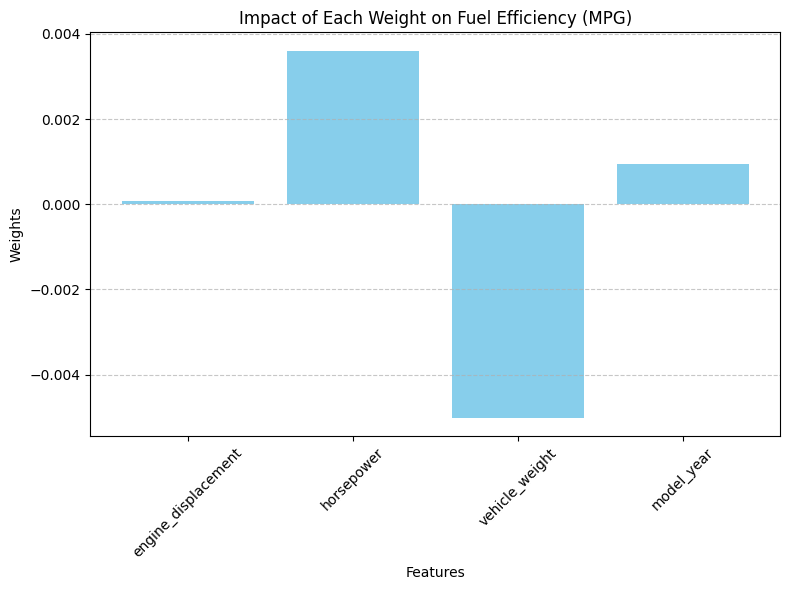

In [418]:
plot_feature_weights(weights_for_zeros_as_na)

#### Question 3.2. Fill missing values with the "mean".

In [419]:
mean = df_train["horsepower"].mean()
mean

np.float64(149.51681843523508)

In [420]:
df_train_with_mean = create_copy_and_fill_with_value(df_train, mean)
df_train_with_mean[df_train_with_mean["horsepower"] == mean].head(2)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
1470,190,149.516818,2712.715764,2002,16.562864
142,240,149.516818,2768.167545,2020,15.421866


In [421]:
X_train_mean, y_train_mean = get_X_y(df_train_with_mean)
[X_train_mean, y_train_mean]

[array([[ 190.        ,  135.        , 3346.05138399, 2015.        ],
        [ 270.        ,  133.        , 3360.81896419, 2001.        ],
        [ 210.        ,   95.        , 3205.61998489, 2011.        ],
        ...,
        [ 270.        ,  181.        , 1925.66722653, 2011.        ],
        [ 120.        ,  177.        , 2543.26486909, 2007.        ],
        [  90.        ,  161.        , 3218.01472816, 2013.        ]],
       shape=(5822, 4)),
 array([13.04634575, 13.06420894, 13.97885765, ..., 20.15852752,
        18.21030332, 14.6202358 ], shape=(5822,))]

In [422]:
w0_for_mean_as_na, weights_for_mean_as_na = calculate_weights(X_train_mean, y_train_mean)
[w0_for_mean_as_na, weights_for_mean_as_na.round(4)]

[np.float64(29.346391381043766), array([ 0.0003,  0.0101, -0.005 , -0.0004])]

In [425]:
[w0_for_zeros_as_na, weights_for_zeros_as_na.round(4)]

[np.float64(27.614530516316947), array([ 0.0001,  0.0036, -0.005 ,  0.0009])]

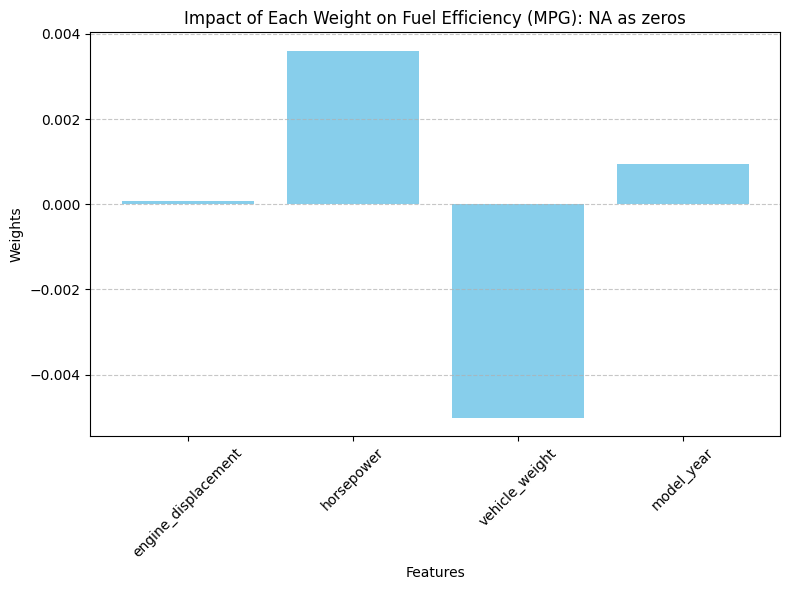

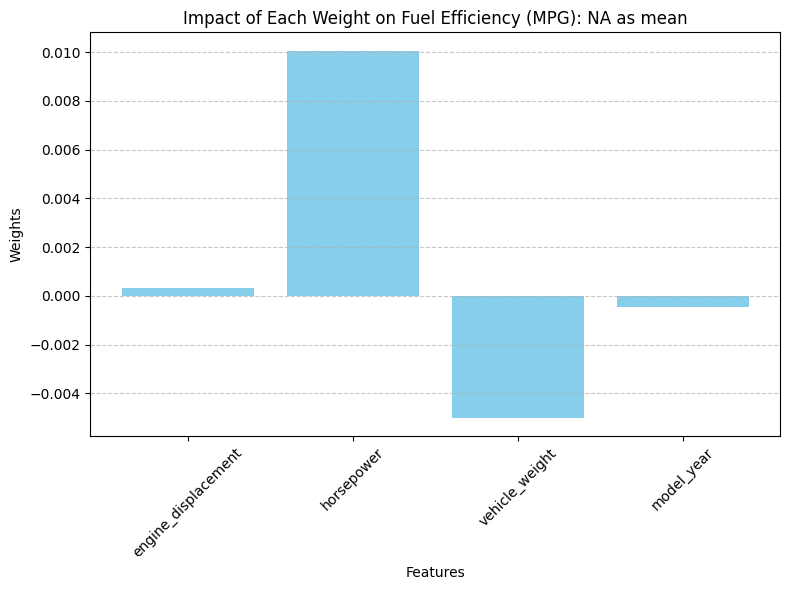

In [424]:
plot_feature_weights(weights_for_zeros_as_na, subtitle=": NA as zeros")
plot_feature_weights(weights_for_mean_as_na, subtitle=": NA as mean")
